In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Upload kaggle api key
! pip install -q kaggle
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
vgg_preds = pd.read_csv('drive/My Drive/collab/submission_simple_resnet50.csv')
resnet_preds = pd.read_csv('drive/My Drive/collab/submission_simple_vgg8.csv')
resnet_imagenet_preds = pd.read_csv('drive/My Drive/collab/submission_transfer_resnet50_clip02.csv')

In [5]:
vgg_preds.columns = ['id', 'vgg_preds']
resnet_preds.columns = ['id', 'resnet_preds']
resnet_imagenet_preds.columns = ['id', 'resnet_imagenet_preds']

In [ ]:
vgg_preds.head()

In [ ]:
resnet_preds.head()

In [6]:
merged = vgg_preds.merge(resnet_preds, how='left', on='id')
merged = merged.merge(resnet_imagenet_preds, how='left', on='id')
merged['ensamble'] = np.mean([merged['vgg_preds'], merged['resnet_preds'], merged['resnet_imagenet_preds']], axis=0)
merged['w_ensamble'] = 0.25 * merged['vgg_preds'] + 0.25 * merged['resnet_preds'] + 0.5 * merged['resnet_imagenet_preds']

In [7]:
merged.head()

,id,vgg_preds,resnet_preds,resnet_imagenet_preds,ensamble,w_ensamble
0,1,0.98,0.98,0.98,0.98,0.98
1,2,0.98,0.98,0.98,0.98,0.98
2,3,0.98,0.98,0.98,0.98,0.98
3,4,0.98,0.98,0.98,0.98,0.98
4,5,0.02,0.02,0.02,0.02,0.02


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


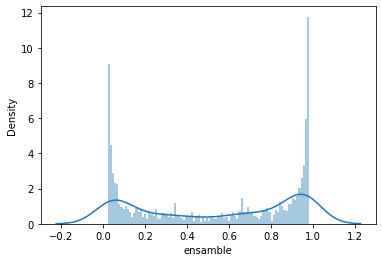

In [14]:
sns.distplot(merged.loc[(merged['ensamble'] != 0.98) & (merged['ensamble'] != 0.02), 'ensamble'], bins=94)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


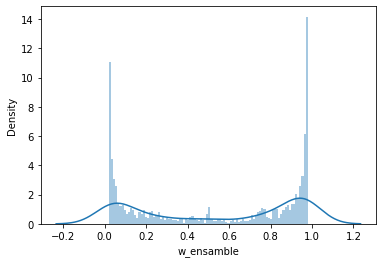

In [15]:
sns.distplot(merged.loc[(merged['ensamble'] != 0.98) & (merged['ensamble'] != 0.02), 'w_ensamble'], bins=94)

In [16]:
submission = merged[['id', 'ensamble']]
submission.columns = ['id', 'label']

In [17]:
submission.columns

Index(['id', 'label'], dtype='object')

In [18]:
submission_path = 'drive/My Drive/collab/ensamble_resnet50_VGG16_imagenetresnet' + '.csv'
submission.to_csv(submission_path, index=False)

In [20]:
! kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f 'drive/My Drive/collab/ensamble_resnet50_VGG16_imagenetresnet.csv' -m "ensamble resnet50, imagenet resnet and VGG16"

100% 148k/148k [00:00<00:00, 708kB/s]
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [21]:
submission2 = merged[['id', 'w_ensamble']]
submission2.columns = ['id', 'label']

In [22]:
submission_path2 = 'drive/My Drive/collab/w_ensamble_resnet50_VGG16_imagenetresnet' + '.csv'
submission2.to_csv(submission_path2, index=False)
! kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f 'drive/My Drive/collab/w_ensamble_resnet50_VGG16_imagenetresnet.csv' -m "weighted ensamble resnet50, imagenet resnet and VGG16"

100% 135k/135k [00:00<00:00, 649kB/s]
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [23]:
# Position on scoreboard (offline)
158 / 1314

0.1202435312024353